## Build the Model 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset into pandas dataframe.
df = pd.read_csv('https://raw.githubusercontent.com/diksha-cl/Data-files/master/Breast_Cancer_Diagnostic.csv')

# Retain the 10 features and the target variable.
df = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']]

# Load the features to a variable X
# X is created by simply dropping the diagnosis column and retaining all others
X = df.drop('diagnosis', axis = 1)

# Load the target variable to y
y = df['diagnosis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Let's create an instance for the LogisticRegression model and then train it with the training set.
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression()
Classifier.fit(X_train,y_train)

# Getting predictions from the model 
y_test_hat = Classifier.predict(X_test)

C:\Users\subhrajit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Evaluate using the confusion matrix

In [2]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_test_hat)
print(cm)

[[101   7]
 [ 12  51]]


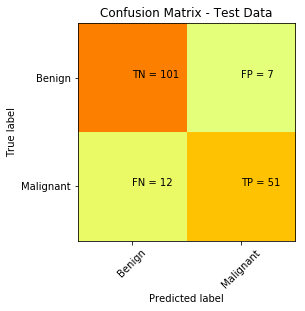

In [3]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Benign','Malignant']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(2)
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [4]:
# Assigning Variables for convinience
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [5]:
recall = TP / float(FN + TP)
print("Recall = ", recall)

Recall =  0.8095238095238095


In [6]:
precision = TP / float(TP + FP)
print("Precision = ", precision)

Precision =  0.8793103448275862


In [7]:
specificity = TN / (TN + FP)
print("Specificity =", specificity)

Specificity = 0.9351851851851852


In [8]:
accuracy = (TN+TP) / (TN+TP+FN+FP)
print("Accuracy =", accuracy)

Accuracy = 0.8888888888888888


Which metrics should you focus on?

Choice of metric depends on your business objective
Identify if FP or FN is more important to reduce
Choose metric with relevant variable (FP or FN in the equation)
Spam filter (positive class is "spam"):
Optimize for precision or specificity
precision
false positive as variable
specificity
false positive as variable
Because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
Fraudulent transaction detector (positive class is "fraud"):
Optimize for sensitivity
FN as a variable
Because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)
